In [6]:
import pandas as pd

# Load the dataset
file_path = '/Users/aungsettpaing/Documents/pythonProject/OnlineTransactionAnalysis/online_retail.csv'
retail_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
retail_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Clean and prepare the data
retail_data.dropna(subset=['InvoiceDate', 'CustomerID'], inplace=True)
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
retail_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
# Analyzing the dataset
# Total Revenue
total_revenue = retail_data['TotalPrice'].sum()
print(f'Total Revenue: {total_revenue}')

# Monthly Revenue
monthly_revenue = retail_data.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum()
print(monthly_revenue)

# Top Customers
top_customers = retail_data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)


Total Revenue: 8300065.814000001
InvoiceDate
2010-12-01     554604.020
2011-01-01     475074.380
2011-02-01     436546.150
2011-03-01     579964.610
2011-04-01     426047.851
2011-05-01     648251.080
2011-06-01     608013.160
2011-07-01     574238.481
2011-08-01     616368.000
2011-09-01     931440.372
2011-10-01     974603.590
2011-11-01    1132407.740
2011-12-01     342506.380
Freq: MS, Name: TotalPrice, dtype: float64
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalPrice, dtype: float64


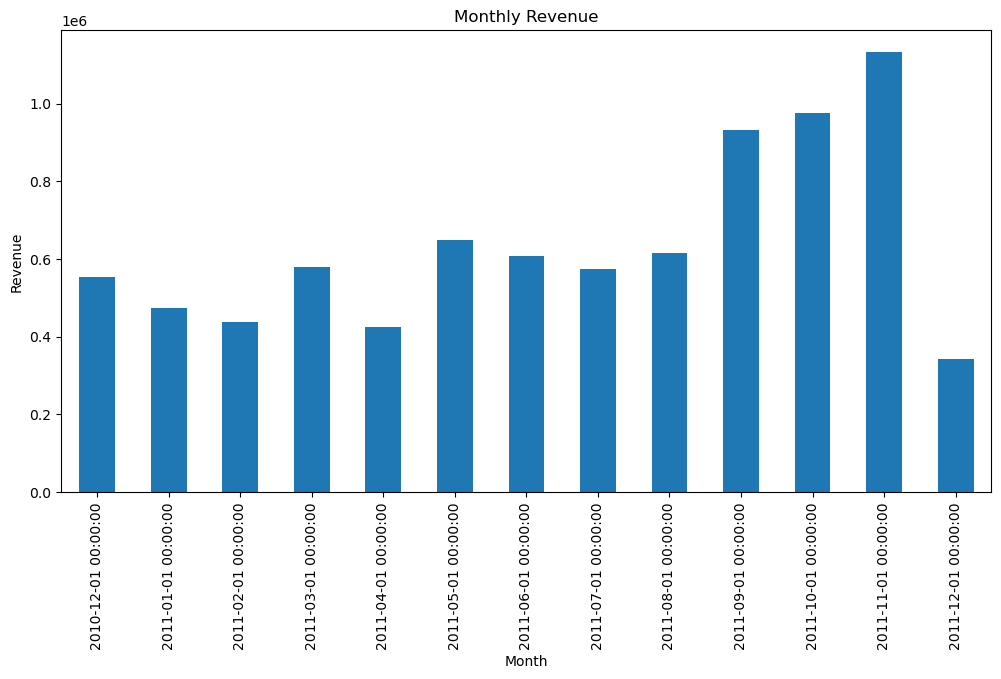

In [14]:
import matplotlib.pyplot as plt

# Plot Monthly Revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


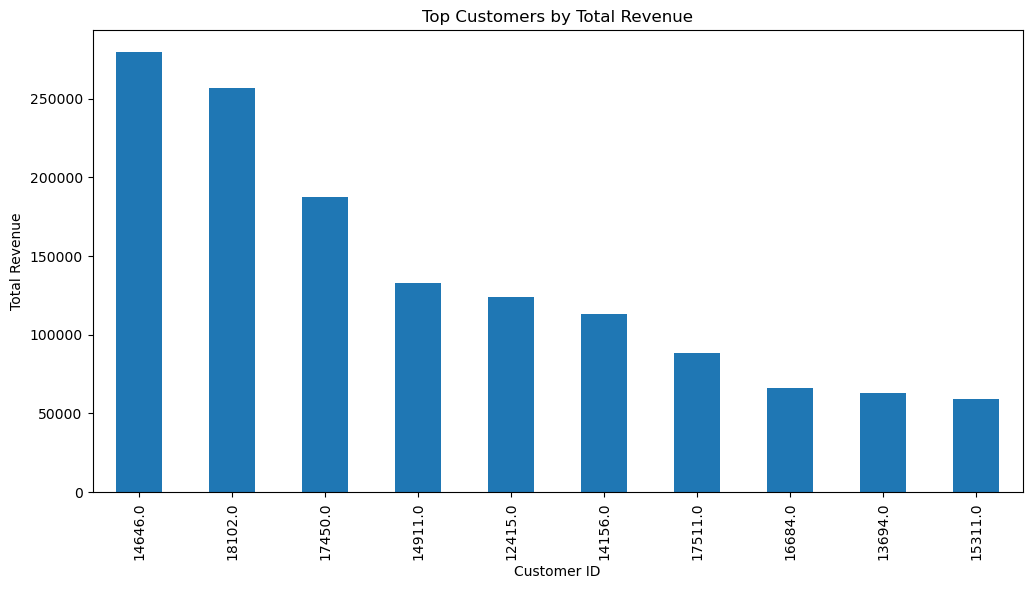

In [16]:
# Plot Top Customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar')
plt.title('Top Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()


In [57]:

# Additional Visualizations for Client Revenue and Profitability Analysis
# Profitability Analysis (Example: Gross Profit Margin)
# Assuming a fixed profit margin of 40%
profit_margin = 0.40

# Calculate estimated unit cost
retail_data['UnitCost'] = retail_data['UnitPrice'] / (1 + profit_margin)
retail_data['UnitCost'] = retail_data['UnitCost'].round(2)
retail_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,UnitCost,GrossProfit,GrossProfitMargin
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1.82,4.371429,28.57
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.811429,28.57
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1.96,6.285714,28.57
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.811429,28.57
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.811429,28.57


In [35]:
retail_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,UnitCost
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1.821429
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.421429
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1.964286
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.421429
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.421429


In [59]:

# Calculate gross profit and gross profit margin
retail_data['GrossProfit'] = retail_data['TotalPrice'] - (retail_data['UnitCost'] * retail_data['Quantity'])

retail_data['GrossProfitMargin'] = (retail_data['GrossProfit'] / retail_data['TotalPrice']) * 100
retail_data['GrossProfitMargin'] = retail_data['GrossProfitMargin'].round(2)
retail_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,UnitCost,GrossProfit,GrossProfitMargin
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1.82,4.38,28.63
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.82,28.61
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1.96,6.32,28.73
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.82,28.61
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.42,5.82,28.61


In [65]:
# Export DataFrame to Excel
output_file = 'retail_data_analysis.xlsx'
retail_data.to_excel(output_file, index=False)

print(f"DataFrame successfully exported to {output_file}.")

DataFrame successfully exported to retail_data_analysis.xlsx.
